<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza_dannyh/MDS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h1 style="text-align: center;"><b>«Практическое занятие MDS»</b>


## Векторы, матрицы и матричные разложения

### Операции с векторами

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

In [9]:
x=np.array([1,0]) # Исходный вектор
theta = 30 * mt.pi / 180 # Градусы в радианах
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # Матрица поворота
B = np.array([[2.5,0],[0,1]]) # Матрица растяжения

In [10]:
Ax = A @ x  # y1 - повренутый вектор
Bx = B @ x  # y2 - вытянутыq вектор

In [11]:
Bx = B @ A @ x

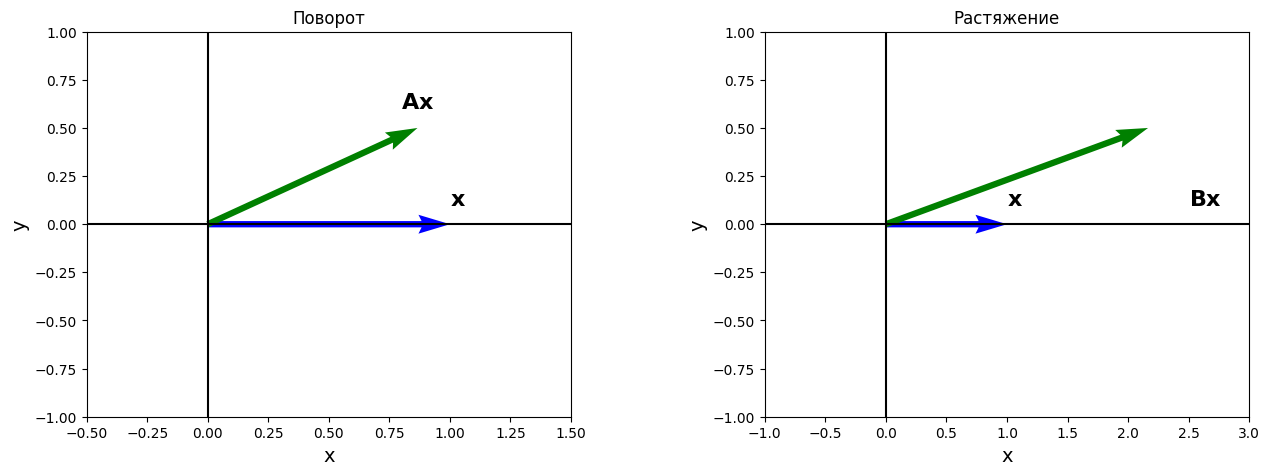

In [12]:
# Храним все векторы в одном массиве
t1 = np.concatenate([x.reshape(1, 2), Ax.reshape(1, 2)], axis=0)
# Храним все векторы в одном массиве
t2 = np.concatenate([x.reshape(1, 2), Bx.reshape(1, 2)], axis=0)

origin = [[0, 0], [0, 0]]  # начало координат

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[:, 0], t1[:, 1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlim([-0.5, 1.5])
ax1.set_ylim([-1, 1])
ax1.set_title("Поворот")
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[:, 0], t2[:, 1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlim([-1, 3])
ax2.set_ylim([-1, 1])
ax2.set_title("Растяжение")
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax2.text(2.5, 0.1, "$\mathbf{Bx}$", fontsize=16)

plt.show()

### Специальные виды матриц

#### Диагональная матрица

In [13]:
v = np.array([2, 4, 3, 1])
A = np.diag(v)
A

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [14]:
A_inv = np.array([[1/2., 0, 0, 0], [0, 1/4., 0, 0], [0, 0, 1/3., 0], [0, 0, 0, 1/1.]])
A_inv

array([[0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [15]:
A.dot(A_inv)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### Симметричная матрица

In [16]:
A = np.array([[2, 4, -1], [4, -8, 0], [-1, 0, 3]])
A

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

#### Ортогональная матрица

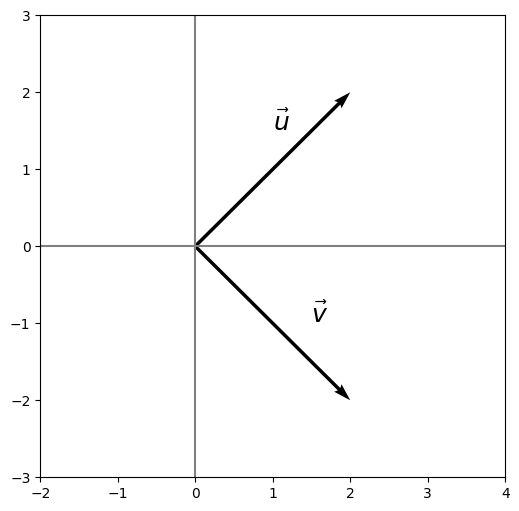

In [17]:
x = [0,0,2,2]
y = [0,0,2,-2]

plt.figure(figsize=(6, 6))
plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

plt.show()
plt.close()

In [18]:
A = np.array([[np.cos(30), -np.sin(30)], [np.sin(30), np.cos(30)]])
A

array([[ 0.15425145,  0.98803162],
       [-0.98803162,  0.15425145]])

In [19]:
col0 = A[:, 0].reshape(A[:, 0].shape[0], 1)
col1 = A[:, 1].reshape(A[:, 1].shape[0], 1)
row0 = A[0, :].reshape(A[0, :].shape[0], 1)
row1 = A[1, :].reshape(A[1, :].shape[0], 1)

In [20]:
col0.T.dot(col1)

array([[0.]])

In [21]:
row0.T.dot(row1)

array([[0.]])

In [22]:
A.T.dot(A)

array([[ 1.00000000e+00, -1.28317219e-17],
       [-1.28317219e-17,  1.00000000e+00]])

In [23]:
A.T

array([[ 0.15425145, -0.98803162],
       [ 0.98803162,  0.15425145]])

In [24]:
np.linalg.inv(A)

array([[ 0.15425145, -0.98803162],
       [ 0.98803162,  0.15425145]])

### Матричное преобразование в общем виде

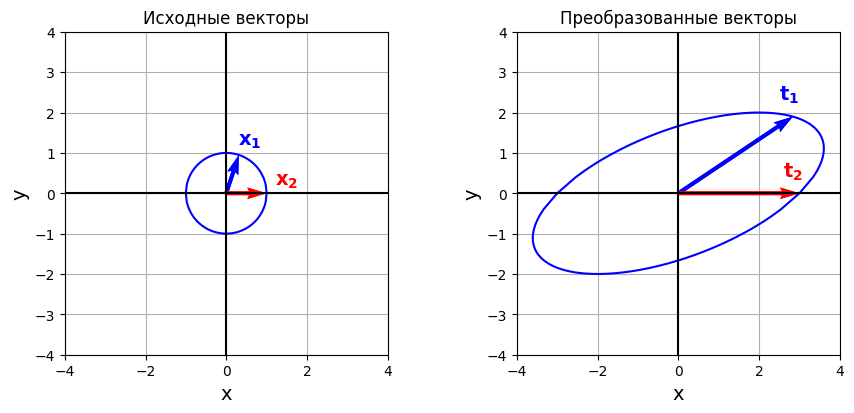

In [25]:
# Единичная окружность
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

# Несколько векторов
x_sample1 = x[:, 65]
x_sample2 = x[:, 100]

A = np.array([[3, 2],
              [0, 2]])

t = A @ x  # Преобразование

t_sample1 = t[:, 65]
t_sample2 = t[:, 100]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# График x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Исходные векторы")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)

# График t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Преобразованные векторы")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)

plt.show()

### Собственные значения и собственные векторы

In [26]:
A = np.array([[3, 2],
              [0, 2]])
lam, u = LA.eig(A)
print("лямбды =", np.round(lam, 4))
print("u =", np.round(u, 4))

лямбды = [3. 2.]
u = [[ 1.     -0.8944]
 [ 0.      0.4472]]


### Визуализация

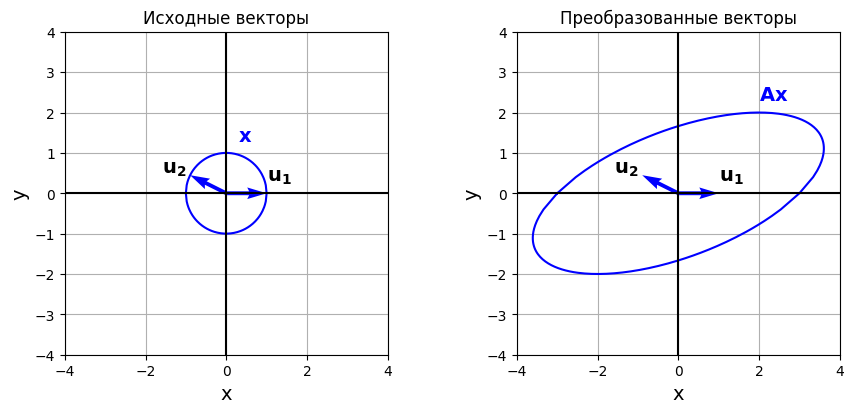

In [27]:
t = A @ x   # Умножение на матрицу

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Исходные векторы")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("Преобразованные векторы")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2, 2.3, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

### Симметричная матрица

lam= [3.618 1.382]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


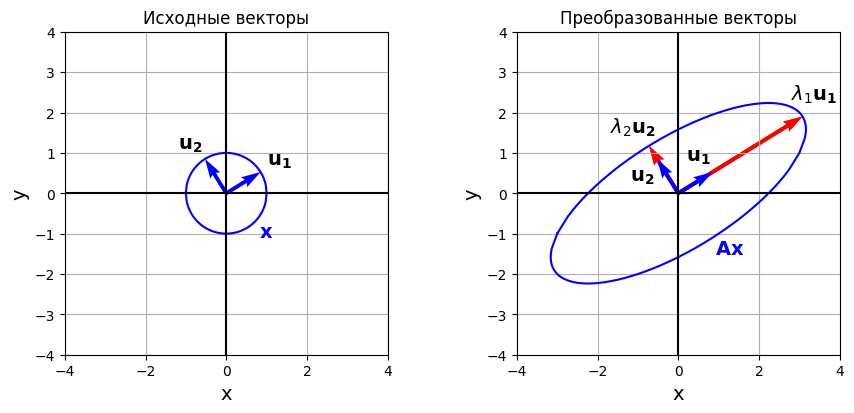

In [28]:
A = np.array([[3, 1],
              [1, 2]])

#A = np.array([[3, 1],
#              [1, 0.8]])

lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

t = A @ x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Исходные векторы")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.7, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.2, 1.1, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.8, -1.1, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, lam[0] * u[0,0], lam[0] * u[1,0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, lam[1] * u[0,1], lam[1] * u[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("Преобразованные векторы")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.2, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.3, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2.8, 2.3, "$\lambda_1\mathbf{u_1}$", fontsize=14)
ax2.text(-1.7, 1.5, "$\lambda_2\mathbf{u_2}$", fontsize=14)
ax2.text(0.9, -1.5, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

### PCA своими руками

In [29]:
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

X = np.hstack([x, y])
X.shape

(100, 2)

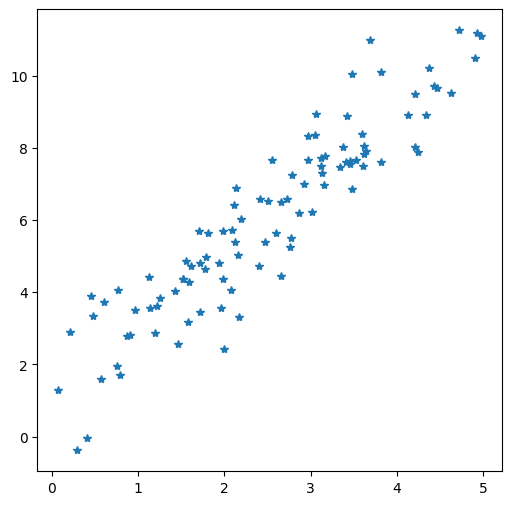

In [30]:
plt.figure(figsize=(6, 6))
plt.plot(X[:,0], X[:,1], '*')
plt.show()

In [31]:
def centerData(X):
    X = X.copy()
    X -= np.mean(X, axis = 0)
    return X

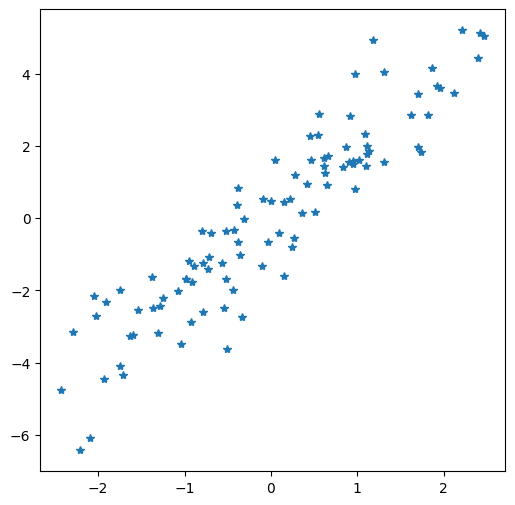

In [32]:
X_centered = centerData(X)
plt.figure(figsize=(6, 6))
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.show()

In [33]:
X_centered.T.dot(X_centered)

array([[150.52943921, 292.95899508],
       [292.95899508, 665.87029332]])

In [34]:
eigVals, eigVecs = np.linalg.eig(X_centered.T.dot(X_centered))
eigVecs

array([[-0.91116273, -0.41204669],
       [ 0.41204669, -0.91116273]])

In [35]:
eigVals

array([ 18.04730409, 798.35242844])

In [36]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors
    """
    plt.figure(figsize=(6, 6))
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

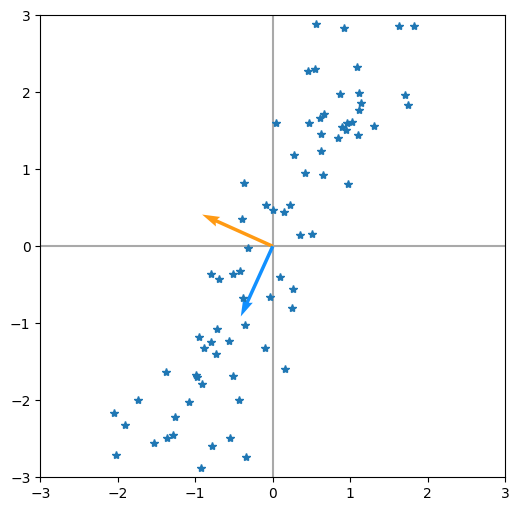

In [37]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors(eigVecs.T, [orange, blue])
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [38]:
eigVals

array([ 18.04730409, 798.35242844])

In [39]:
eigVecs

array([[-0.91116273, -0.41204669],
       [ 0.41204669, -0.91116273]])

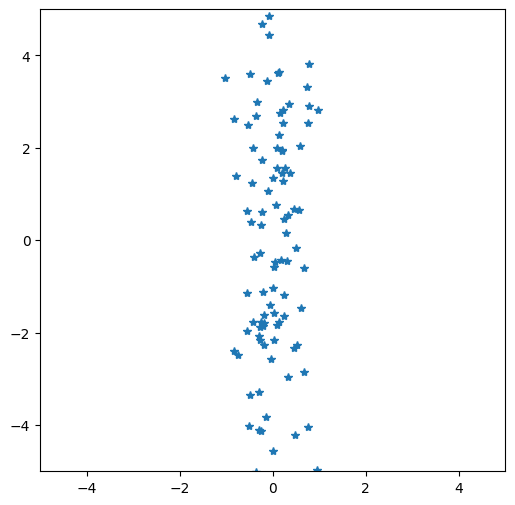

In [40]:
X_new = eigVecs.T.dot(X_centered.T)

plt.figure(figsize=(6, 6))
plt.plot(eigVecs.T.dot(X_centered.T)[0, :], eigVecs.T.dot(X_centered.T)[1, :], '*')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### Смена координат векторов

x_B= [[4.  ]
 [2.83]]


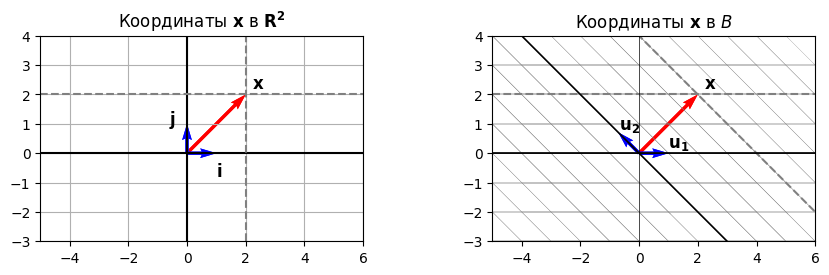

In [41]:
# Базис
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

#v_1 = np.array([[2],[0]])
#v_2 = np.array([[1],[1]])

# Матрица смены координат
p = np.concatenate([v_1, v_2], axis=1)
p_inv = np.linalg.inv(p)

# Исходные координаты x в R^2
x=np.array([[2], [2]])

# Новые координаты в базисе B
x_B = p_inv @ x

print("x_B=", np.round(x_B, 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x in R2
ax1.quiver(*origin, x[0], x[1], color=['r'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, 1, 0, color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, 0, 1, color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)

ax1.set_xlim([-5,6])
ax1.set_ylim([-3,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Координаты $\mathbf{x}$ в $\mathbf{R^2}$")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(x[0]+0.2, x[1]+0.2, "$\mathbf{x}$", fontsize=12)
ax1.text(1, -0.8, "$\mathbf{i}$", fontsize=12)
ax1.text(-0.6, 1, "$\mathbf{j}$", fontsize=12)
ax1.axvline(x=x[0], color='grey', linestyle='--')
ax1.axhline(y=x[1], color='grey', linestyle='--')

# Plotting x in B
# Plotting the grid
multipliers = np.linspace(-10,10,100)

for i in range(-6,7,4):
    for j in range(-6,7,1):
        grid_1 = (v_1 * multipliers) + np.array([[i],[j]])
        grid_2 = (v_2 * multipliers) + np.array([[i],[j]])
        ax2.plot(grid_1[0], grid_1[1], color='grey', linewidth=0.2)
        ax2.plot(grid_2[0], grid_2[1], color='grey', linewidth=0.2)

# Plotting the vector guide
vector_guide_1 = (v_1 * multipliers) + x
vector_guide_2 = (v_2 * multipliers) + x
ax2.plot(vector_guide_1[0], vector_guide_1[1], color='grey', linewidth=1.5, linestyle='--')
ax2.plot(vector_guide_2[0], vector_guide_2[1], color='grey', linewidth=1.5, linestyle='--')

# Plotting the axis
vector_guide_1 = (v_1 * multipliers) + np.array([[0],[0]])
vector_guide_2 = (v_2 * multipliers) + np.array([[0],[0]])
ax2.plot(vector_guide_1[0], vector_guide_1[1], color='black', linewidth=1.2)
ax2.plot(vector_guide_2[0], vector_guide_2[1], color='black', linewidth=1.2)

ax2.quiver(*origin, x[0], x[1], color=['r'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, v_1[0], v_1[1], color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, v_2[0], v_2[1], color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)

ax2.set_xlim([-5,6])
ax2.set_ylim([-3,4])
ax2.set_aspect('equal')

ax2.set_title("Координаты $\mathbf{x}$ в $\mathit{B}$")
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.text(x[0]+0.2, x[1]+0.2, "$\mathbf{x}$", fontsize=12)
ax2.text(1, 0.2, "$\mathbf{u_1}$", fontsize=12)
ax2.text(-0.7, 0.8, "$\mathbf{u_2}$", fontsize=12)

plt.show()

### Спектральное разложение

In [42]:
A = np.array([[3, 1],
              [1, 2]])
lam, u = LA.eig(A)

In [43]:
lam

array([3.61803399, 1.38196601])

In [44]:
u

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [45]:
u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
A_1 = lam1 * (u1 @ u1.T)
u2= u[:,1].reshape(2,1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)
print("A_1=", np.round(A_1, 4))
print("A_2=", np.round(A_2, 4))

A_1= [[2.618 1.618]
 [1.618 1.   ]]
A_2= [[ 0.382 -0.618]
 [-0.618  1.   ]]


In [46]:
A_1 + A_2

array([[3., 1.],
       [1., 2.]])

In [47]:
lam_A_1, u_A_1 = LA.eig(A_2)
print("lam=", np.round(lam_A_1, 4))
print("u=", np.round(u_A_1, 4))

lam= [0.    1.382]
u= [[-0.8507  0.5257]
 [-0.5257 -0.8507]]


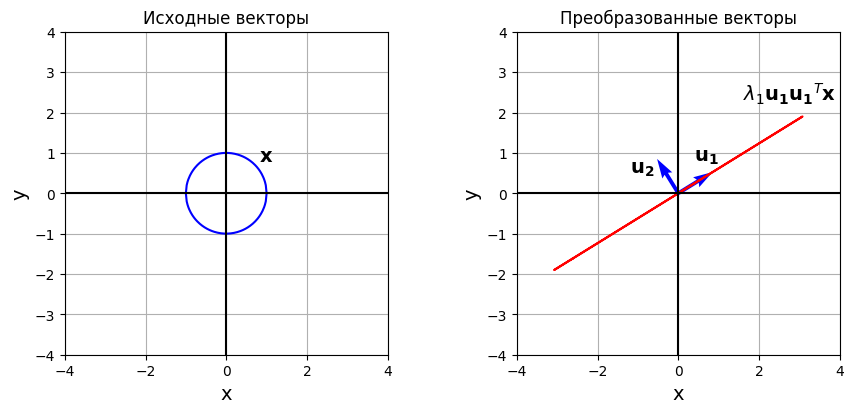

In [48]:
# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

t = A_1 @ x  # Vectors in t are the transformed vectors of x

# getting the transformed sample of x from t
t_sample = t[:, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting s
ax1.plot(x[0,:], x[1,:], color='b')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Исходные векторы")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.8, 0.8, "$\mathbf{x}$", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='r')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("Преобразованные векторы")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.4, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(1.6, 2.3, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=14)

plt.show()

In [49]:
B = np.array([[3, 2],
              [0, 2]])
lam, u = LA.eig(B)

print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


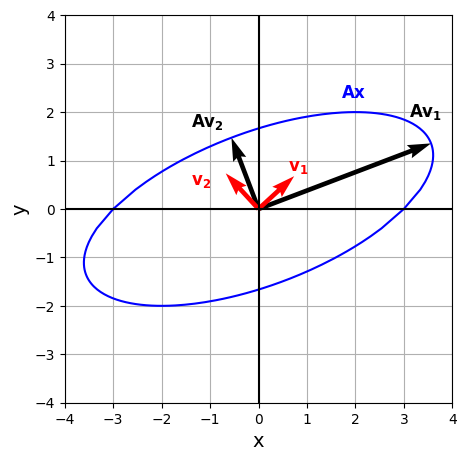

In [50]:
A = np.array([[3, 2],
              [0, 2]])
lam_A, u_A = LA.eig(A)

A2 = A.T @ A

lam_A2, u_A2 = LA.eig(A2)

t = A @ x   # Vectors in t are the transformed vectors of x
t1 = A2 @ x  # Vectors of A.A
Av = A @ u_A2  # Vectors Avi

fig, (ax2) = plt.subplots(1, 1, figsize=(5,10))

# Plotting Ax
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, Av[0,:], Av[1,:], color=['black'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, u_A2[0,:], u_A2[1,:], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.7, 2.3, "$\mathbf{Ax}$", color="b", fontsize=12)
ax2.text(0.6, 0.8, "$\mathbf{v_1}$", color='r', fontsize=12)
ax2.text(-1.4, 0.5, "$\mathbf{v_2}$", color='r', fontsize=12)
ax2.text(3.1, 1.9, "$\mathbf{Av_1}$", color='black', fontsize=12)
ax2.text(-1.4, 1.7, "$\mathbf{Av_2}$", color='black', fontsize=12)

plt.show()

In [51]:
B = np.array([[3, -1],
              [1, 2]])
lam, u = LA.eig(B)

print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [2.5+0.866j 2.5-0.866j]
u= [[0.7071+0.j     0.7071-0.j    ]
 [0.3536-0.6124j 0.3536+0.6124j]]


### Сингулярное разложение

In [52]:
A = np.array([[4, 1, 3],
              [8, 3, -2]])
lam, v = LA.eig(A.T @ A)
print("lam=", np.round(lam, 4))
print("v=", np.round(v, 4))

lam= [90.1167  0.     12.8833]
v= [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [53]:
A.T @ A

array([[80, 28, -4],
       [28, 10, -3],
       [-4, -3, 13]])

In [54]:
V = v[:, lam.argsort()[::-1]]

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)

print("Sigma=", np.round(Sigma, 4))
print("V=", np.round(V, 4))

Sigma= [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
V= [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [55]:
r = len(sigma)
U = A @ V[:,:r] / sigma
print("U=", np.round(U, 4))

U= [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


In [56]:
A_reconstructed = U @ Sigma @ V.T
A_reconstructed

array([[ 4.,  1.,  3.],
       [ 8.,  3., -2.]])

Но, конечно, в Python есть встроенная функция svd()

In [57]:
U, s, VT = LA.svd(A)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("V", np.round(VT.T, 4))

U= [[-0.4121 -0.9111]
 [-0.9111  0.4121]]
s= [9.493  3.5893]
V [[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]


In [58]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
A_reconstructed = U @ Sigma @ VT
A_reconstructed

array([[ 4.,  1.,  3.],
       [ 8.,  3., -2.]])

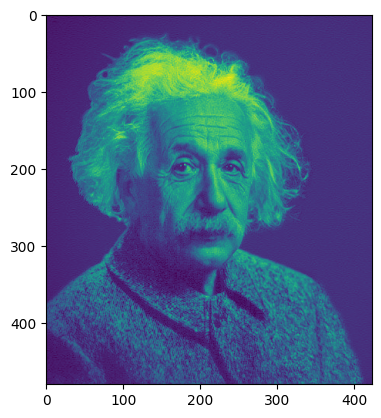

In [62]:
# Исходное изображение
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza%20dannyh/photo.png"

response = requests.get(url, stream=True)
image = Image.open(response.raw)
mat = np.array(image)


### Примеры использования SVD

In [ ]:
# Исходное изображение
mat = plt.imread("./photo.png")

# SVD
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Восстановление
k = 10
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Исходное изображение", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Восстановленное с помощью \n первых {} сингулярных значений".format(k), y=1.05)

plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 6):
    mat_i = mat_i + s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)

plt.show()

### Анализ форм на изображении

In [ ]:
# Исходное изображение
mat = plt.imread("./shapes.png")

# SVD
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Исходное изображение", y=1.05)

for i in range(1, 4):
    k = i * 2
    # Восстановление
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 2, i % 2].imshow(mat_approx, cmap='gray')
    axes[i // 2, i % 2].set_title("Восстановленное с помощью \n первых {} сингулярных значений".format(k), y=1.05)

plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.05)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    #mat_i[mat_i < 1e-8] = 0
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), y=1.05, fontsize=16)

plt.show()

In [ ]:
# Исходное изображение
mat = plt.imread("./monument.png")

# SVD
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Восстановление
k = 1
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Исходное изображение", y=1.05)

ax2.imshow(mat_approx)
ax2.set_title("$\sigma_1\mathbf{u_1}\mathbf{v_1}^T$", y=1.05)

plt.show()

### Удаление шумов

In [ ]:
# Исходное изображение
mat = plt.imread("./text.png")

# Добавим шум
noise = np.random.rand(mat.shape[0], mat.shape[1])
mat[noise > 0.95] = 0

In [ ]:
plt.imshow(mat,cmap='gray')
plt.show

In [ ]:
# SVD
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image", y=1.08)

k_list = [20, 55, 200]
for i in range(1, 4):
    k = k_list[i-1]
    mat_rank_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    axes[i // 2, i % 2].imshow(mat_rank_k, cmap='gray')
    axes[i // 2, i % 2].set_title("Восстановленное с помощью \n первых {} сингулярных значений".format(k), y=1.08)

plt.show()

### Псевдообратные матрицы - Теорема Мура — Пенроуза

In [ ]:
A = np.array([[7, 2], [3, 4], [5, 3]])
A

In [ ]:
np.linalg.inv(A)

In [ ]:
U, D, V = np.linalg.svd(A)

D_plus = np.zeros((A.shape[0], A.shape[1])).T
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

A_plus = V.T.dot(D_plus).dot(U.T)
A_plus

In [ ]:
np.linalg.pinv(A)

In [ ]:
A_plus.dot(A)

#### Переопределенная система уравнений

In [ ]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [ ]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
A_plus = np.linalg.pinv(A)
A_plus

In [ ]:
b = np.array([[-2], [-8], [-2]])
res = A_plus.dot(b)
res

In [ ]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()

#### Линейная регрессия

<img src=https://github.com/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza%20dannyh/dataset.png?raw=1 alt="drawing" width="300"/>

In [ ]:
A = np.array([[0, 1], [1, 1], [2, 1], [3, 1], [3, 1], [4, 1]])
A

In [ ]:
b = np.array([[2], [4], [0], [2], [5], [3]])
b

In [ ]:
A_plus = np.linalg.pinv(A)
A_plus

In [ ]:
coefs = A_plus.dot(b)
coefs

In [ ]:
x = np.linspace(-1, 5, 1000)
y = coefs[0]*x + coefs[1]

plt.plot(A[:, 0], b, '*')
plt.plot(x, y)
plt.xlim(-1., 6)
plt.ylim(-0.5, 5.5)

plt.show()

In [ ]:
np.polyfit(A[:, 0], b, 1)

Больше точек!

In [ ]:
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

In [ ]:
A = np.hstack((x, np.ones(np.shape(x))))
A[:10]

In [ ]:
A_plus = np.linalg.pinv(A)
coefs = A_plus.dot(y)
coefs

In [ ]:
x_line = np.linspace(0, 5, 1000)
y_line = coefs[0]*x_line + coefs[1]

plt.plot(x, y, '*')
plt.plot(x_line, y_line)
plt.show()

## Коллаборативная фильтрация

<img src="https://github.com/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza%20dannyh/movie.png?raw=1" alt="drawing" width="700"/>

In [ ]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: матрица оценок
    P: |U| * K (матрица пользователей)
    Q: |D| * K (матрица объектов)
    K: латентные характеристики
    steps: итерации
    alpha: learning rate
    beta: регуляризация'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # расчет ошибки
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # градиентный метод с параметрами alpha и beta
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: локальный минимум
        if e < 0.001:

            break

    return P, Q.T

<img src="https://github.com/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza%20dannyh/mfac.jpeg?raw=1" alt="drawing" width="700"/>

In [ ]:
R = [

     [5,3,0,1,0,0],

     [4,0,0,1,7,2],

     [1,1,0,5,1,0],

     [1,0,0,4,0,1],

     [0,1,5,0,4,0],

     [2,1,3,0,0,1],

    ]

R = numpy.array(R)
# N: число пользователей
N = len(R)
# M: число фильмов
M = len(R[0])
# K: число характеристик
K = 10


P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)



nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

In [ ]:
nR

## Обучение моделей и градиентные методы

### Простой градиентный спуск

In [ ]:
x = np.linspace(-10, 0, 100)
y = (x+5)**2

plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('Функция')
plt.ylim(-0.5, 6)
plt.xlim(-10, 0)
plt.show()
#

In [ ]:
cur_x = 3 # начальная точка x=3
rate = 0.1 # Learning rate
precision = 0.0001 # точность решения
previous_step_size = 1 #
max_iters = 10000 # вычислительный бюджет в итерациях
iters = 0 # счетчик итераций
df = lambda x: 2*(x+5) # градиент

In [ ]:
def grad01(x):
    return 2*(x+5)

In [ ]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x # предыдущее значение x
    cur_x = cur_x - rate * grad01(prev_x) # Собственно спуск
    previous_step_size = abs(cur_x - prev_x) # изменение по x для оценки точности
    iters = iters+1 # счетчик
    print("Итерация № ",iters,"\nЗначение X = ",cur_x) #Print iterations

print("Локальный минимум в точке X* = ", cur_x)

### Встроенные функции

#### sympy

In [ ]:
from sympy import *
x = Symbol('x')
diff(cos(x**2),x)

#### scipy

In [ ]:
from scipy.misc import derivative

def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-3)

#### autograd

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [ ]:
Q = 3*a**3 - b**2

In [ ]:
Q

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [ ]:
a.grad

In [ ]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

### Градиентный спуск для линейной регрессии

<img src="https://github.com/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza%20dannyh/SimpleANN01.png?raw=1" alt="drawing" width="150"/>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(seed=13)

In [ ]:
# 20 точек из равномерного распределения
x = np.random.uniform(0, 1, 20)

# Исходная функция из которой делаем зашумленные данные
def f(x):
    return x * 2

# Создаем экспериментальные точки t
noise_variance = 0.2  # Дисперссия шума
# Нормальный шум
noise = np.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise
#

In [ ]:
# График t
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# График модели
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('Функция t(x)')
plt.legend(loc=2)
plt.show()
#

In [ ]:
def nn(x, w):
    """Наша модель y = x * w"""
    return x * w


def loss(y, t):
    """Функция потерь MSE"""
    return np.mean((t - y)**2)

In [ ]:
# Зависимость ошибки от веса w

ws = np.linspace(0, 4, num=100)  # значения весов
# значения функции потерь
loss_ws = np.vectorize(lambda w: loss(nn(x, w) , t))(ws)

# График
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Функция потерь по отношению к $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()
#

In [ ]:
def gradient(w, x, t):
    """Градиент функции потерь относительно параметра."""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Расчет величины шага"""
    return learning_rate * np.mean(gradient(w_k, x, t))

In [ ]:
# Инициализация веса
w = np.random.rand()
learning_rate = 0.9

# Градиентный спуск:
nb_of_iterations = 4  # число итераций
w_loss = [(w, loss(nn(x, w), t))] # Запись значений для визуализации
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Величина шага
    w = w - dw  # Обновление значения веса
    w_loss.append((w, loss(nn(x, w), t)))  # Сохранение шагов для визуализации

for i in range(0, len(w_loss)):
    print(f'Вес w({i}): {w_loss[i][0]:.4f} \t Функция потерь: {w_loss[i][1]:.4f}')

In [ ]:
# Визуализация
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Обновления
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Градиентный спуск на функции потерь')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()
#

In [ ]:
# Визуализация результатов
plt.figure(figsize=(6, 4))
# Экспериментальные данные
plt.plot(x, t, 'o', label='$t$')
# Исходная функция
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
# Построенная модель
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()
#

### Пример обучения простой нейронной сети с использованием градиентого спуска

<img src="https://github.com/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Master_klass_%20Matematika_dlya_analiza%20dannyh/SimpleANN02.png?raw=1" alt="drawing" width="250"/>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(seed=1)

In [ ]:
# Тестовые данные
nb_of_samples_per_class = 25  # Число точек в каждом классе
red_mean = (-1., 0.)  # Среднее красного класса
blue_mean = (1., 0.)  # Среднее синего класса
# Генерация выборки
x_red = np.random.randn(nb_of_samples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2)  + blue_mean

# Формирование выборки размеченных данных
X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)),
               np.ones((nb_of_samples_per_class,1))))
#

In [ ]:
# Визуализация
plt.figure(figsize=(6, 4))
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='класс: красная звезда')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='класс: синий круг')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.title('красная звезда vs. синий круг')
plt.show()
#

In [ ]:
# Логистическая функция активации
def logistic(z):
    return 1. / (1 + np.exp(-z))

# нейронная сеть с логистической функцией y = 1 / (1 + numpy.exp(-x*w))
def nn(x, w):
    return logistic(x.dot(w.T))

# Округление для классификации 0 или 1
def nn_predict(x,w):
    return np.around(nn(x,w))

# Функция потерь на основе энтропии
def loss(y, t):
    return - np.mean(
        np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

In [ ]:
# Визуализаця функции потерь
nb_of_ws = 25 # число точек
wsa = np.linspace(-5, 5, num=nb_of_ws) # вес a
wsb = np.linspace(-5, 5, num=nb_of_ws) # вес b
ws_x, ws_y = np.meshgrid(wsa, wsb) # решетка
loss_ws = np.zeros((nb_of_ws, nb_of_ws)) # инициализация матрицы потерь
# Заполнение матрицы потерь
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i,j] = loss(
            nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)
# Построение графика
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function surface')
plt.grid()
plt.show()
#

In [ ]:
# Трехмерная визуализация

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[8, 5])
ax = fig.gca(projection='3d')
ax.view_init(45, -60)

surf = ax.plot_surface(ws_x, ws_y, loss_ws, cmap=cm.viridis)
plt.show()

In [ ]:
def gradient(w, x, t):
    """Расчет градиента"""
    return (nn(x, w) - t).T * x


def delta_w(w_k, x, t, learning_rate):
    """Шаги для каждого из весов в виде вектора {w_a, w_b}."""
    return learning_rate * gradient(w_k, x, t)

In [ ]:
# Инициализация
w = np.asmatrix([-4, -2])  # Случайные значения
learning_rate = 0.05

# Градиентный спуск и запись результатов
nb_of_iterations = 8  # Число итераций
w_iter = [w]  # Сохранение промежуточных результатов
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)  # Расчет шага
    w = w - dw  # Обновление весов
    w_iter.append(w)  # Сохранение результатов для визуализации

In [ ]:
# Визуализация
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.75, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

# Обновления
for i in range(1, 6):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # Plot the weight-loss values that represents the update
    plt.plot(w1[0,0], w1[0,1], marker='o', color='#3f0000')  # Plot the weight-loss value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], linestyle='-', color='#3f0000')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='#3f0000')
# Последний вес
w1 = w_iter[8]
plt.plot(w1[0,0], w1[0,1], marker='o', color='#3f0000')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='#3f0000')
# Итоговый график
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Градиентный спуск')
plt.show()
#

In [ ]:
# Визуализация результатов
plt.figure(figsize=(6, 4))
# Число интервалов
nb_of_xs = 100
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) # создаем решетку
# Инициализация графика
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]) , w)
# Цветовые поля для классов
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3)])

# Общая визуализация
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='Красная звезда')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='Синий круг')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Граница разбиения')
plt.axis([-3, 4, -4, 4])
plt.show()
#